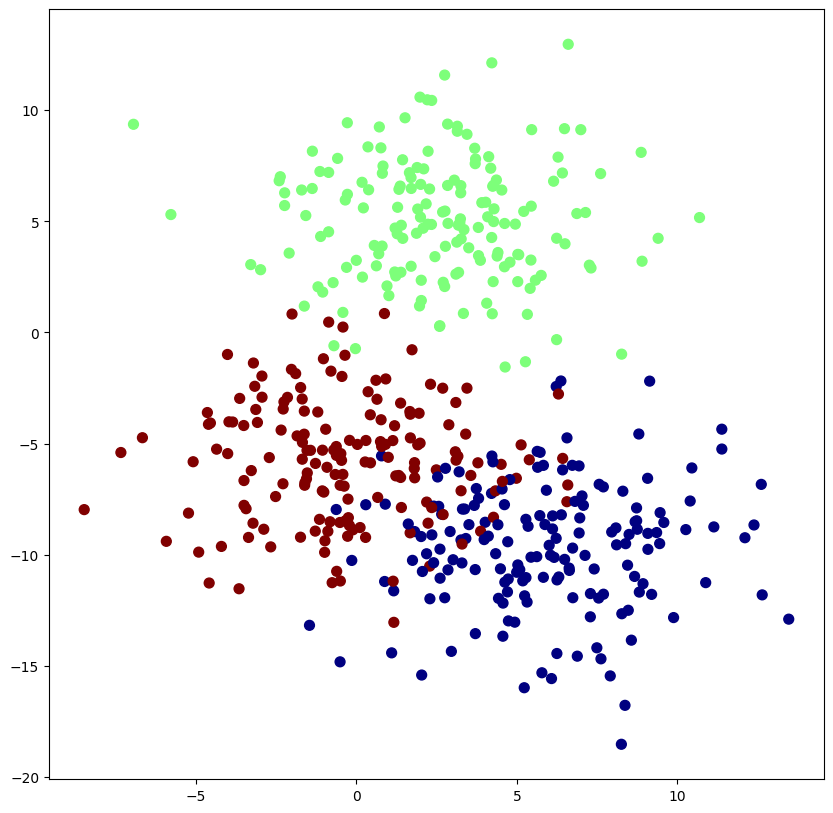

In [1]:
# Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=3,
                  random_state=10, cluster_std=3)

# Scatter plot the points
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

In [2]:
# ハイパパラメータ
min_sample_leaf = 5 # ノード内に属するサンプルの最小数
max_depth = 3 # 木の深さの最大値

In [8]:
# ジニ不純度を計算する関数
def gini(X: np.ndarray, y: np.ndarray) -> float:
    """
    ジニ不純度を計算する関数# Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=3,
                  random_state=10, cluster_std=3)
    """
    # 各クラスのサンプル数をカウント
    _, counts = np.unique(y, return_counts=True)
    
    # ジニ不純度を計算
    impurity = 1 - sum((count / len(y)) ** 2 for count in counts)
    
    return impurity

gini(X, y)

np.float64(0.66)

In [ ]:
parent_impurity = gini(X, y)
best_gain, gain, threshold = 0, None, 0
idxs = np.argsort(X[:, 0])
print(idxs)
# ソート後の値
sorted_vals = X[idxs, 0]
print(sorted_vals)
sorted_y = y[idxs]
print(sorted_y)

# 左から数えていくため、左側はまだ、値が無い。右側にすべての値が存在する。
left_counts = np.zeros(3, dtype=int)
right_counts = np.bincount(sorted_y, minlength=3)
print(right_counts)

# 隣接する値のラベルが異なる場合のみ、しきい値候補とする
for i in range(1, sorted_vals.size):
    # 左側の値を更新
    left_counts[sorted_y[i - 1]] += 1
    # 右側の値を更新
    right_counts[sorted_y[i - 1]] -= 1

    # 隣接する値のラベルが同じ場合はスキップ
    if sorted_y[i] == sorted_y[i - 1]:
        continue

    # 最小分割数の場合はスキップ
    if left_counts.sum() < min_sample_leaf or right_counts.sum() < min_sample_leaf: continue

    # ジニ不純度を計算
    left_impurity = gini(sorted_vals[:i], sorted_y[:i])
    right_impurity = gini(sorted_vals[i:], sorted_y[i:])
    gain = (parent_impurity -
                (left_counts.sum() * left_impurity +
                right_counts.sum() * right_impurity) / 
                (left_counts.sum() + right_counts.sum()))
    
    if gain > best_gain or best_gain is None:
        best_gain = gain
        
        # 現在のしきい値候補
        threshold = (sorted_vals[i] + sorted_vals[i - 1]) / 2

# 出力
print(f"Threshold: {threshold:.2f}, Gini Impurity: {gain:.4f}, "
        f"Left Counts: {left_counts}, Right Counts: {right_counts}")

[239 485 282 292  86  66 430  38 131  71 441 412 106 269 357  69 334 420
 366 102 331  77 279 327 237 294 493 345 186 360 244 415 108   2 183 176
 444 163 418 351 144 193 359 313 115 273  47  65 104 392 152 222 117 185
 194 192  37 387 368 451 365   9   8  53 246 148 226  22 344  54 363  30
 436 188 251 458 153  44  96 339  49  83 206 361 490 462 486 483 267 299
 309  62 399 229 220  20 211 135 445 149 492  60 217 457 330 405 257 218
 367 428 162 440 262  13 341  56 439  91 230 467 168 310 413 446 250 358
 414 297 157 400 307 434 201 352 328 433 421 296 452 472 255 318 259 450
 210 198 242 311 263 371  18 364  94 449 127 249 272 175 215  81 491 195
 305 425 284 288 423 280 156 362 373 281 466  48 409  57 275 388 300  21
 402 158 227  73 431 464 319 209 264 141 489 408  51 478 380 170 248  59
 165 323 286 258 138 417  70 245 181 372 396 488 238 125 384  26 240  90
 397 389 253 416 252 316 298 172 265  32 329 293 202 225 370 228 332 448
 129 132 398 349 437 236 214  72 271 151 145 114 43

In [ ]:
a = np.array([0, 2])
b = np.array([4, 5, 6])

array([4, 6])

In [4]:
centroids = X[np.random.choice(X.shape[0], 3, replace=False)]
centroids.shape

(3, 2)

In [6]:
X[:, np.newaxis].shape, centroids.shape

((500, 1, 2), (3, 2))

In [23]:
hoge = X[:4, :]
hoge[:,np.newaxis], centroids
print(hoge[:,np.newaxis].shape)
print(hoge[:,np.newaxis]-centroids[np.newaxis,:,:])
# hoge[:,np.newaxis]-centroids
# np.linalg.norm(hoge-centroids).shape

(4, 1, 2)
[[[  1.74245582  23.78455477]
  [ -3.30105945   2.56911822]
  [  3.98907903  17.77908802]]

 [[  4.54674567   8.34774833]
  [ -0.4967696  -12.86768822]
  [  6.79336888   2.34228159]]

 [[ -4.08110204  17.2350531 ]
  [ -9.12461731  -3.98038345]
  [ -1.83447883  11.22958636]]

 [[  6.80789252  -1.03698527]
  [  1.76437724 -22.25242182]
  [  9.05451572  -7.04245201]]]
